# Data wrangling WeRateDogs

<a id='intro'></a>
## Introduction



The purpose of this project is to wrangle, analyse, and visualize tweet archive of Twitter user @dog_rates, also known as WeRateDogs.

<a id='gather'></a>
## Gathering data

1. **The WeRateDogs Twitter archive:** Download this file by the following link: twitter_archive_enhanced.csv

2. **The twitter image predictions**, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3. **Twitter API & JSON:** Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

**1. The WeRateDogs Twitter archive**

In [1]:
#Import packages
import pandas as pd
import numpy as np
import re
import json 
import tweepy 
from tweepy import OAuthHandler
from timeit import default_timer as timer
import zipfile
import matplotlib.pyplot as plt
%matplotlib inline
import requests



In [2]:
#read twitter-archive-enhanced file and save as twitter_archive_enhanced
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [41]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

6 columns have null value.

**2. The twitter image predictions**

In [3]:
#download file 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
image = requests.get(url)

In [4]:
#open image-predictions file
with open('image-predictions.tsv','wb') as file:
    file.write(image.content)

In [5]:
#read image_predictions file
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t' )

**3.Twitter API & JSON**

In [45]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)


 NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
 df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
NOTE TO REVIEWER: this student had mobile verification issues so the following
Twitter API code was sent to this student from a Udacity instructor
Tweet IDs for which to gather additional data via Twitter's API

In [46]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)


In [6]:
# extract file
with open('tweet-json.zip','rb') as f:
    z_tweets = zipfile.ZipFile(f)
    z_tweets.extractall()

In [7]:
# read tweet-json file
with open('tweet-json copy', 'r') as f:
    tweet_json = pd.read_json(f, lines= True, encoding = 'utf-8')

In [49]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [8]:
tweet_json = tweet_json.rename(columns = {'id' : 'tweet_id'})

In [9]:
# select the columns of interest : 'tweet_id', 'retweeted_status','favorite_count','retweet_count', 'source'
tweet_json = tweet_json.loc[:,['tweet_id','retweeted_status', 'favorite_count','retweet_count','source']]

1. **Summary** 
After gethering data, I following the steps of introduction, gathering data from csv file, downloading tsv file from Twitter's API, and saving them into notebook file.

<a id='assess'></a>
## Assessing data

### Visually assess

In [52]:
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [53]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [54]:
tweet_json

,tweet_id,retweeted_status,favorite_count,retweet_count,source
0,892420643555336193,NaN,39467,8853,"<a href=""http://twitter.com/download/iphone"" r..."
1,892177421306343426,NaN,33819,6514,"<a href=""http://twitter.com/download/iphone"" r..."
2,891815181378084864,NaN,25461,4328,"<a href=""http://twitter.com/download/iphone"" r..."
3,891689557279858688,NaN,42908,8964,"<a href=""http://twitter.com/download/iphone"" r..."
4,891327558926688256,NaN,41048,9774,"<a href=""http://twitter.com/download/iphone"" r..."
5,891087950875897856,NaN,20562,3261,"<a href=""http://twitter.com/download/iphone"" r..."
6,890971913173991426,NaN,12041,2158,"<a href=""http://twitter.com/download/iphone"" r..."
7,890729181411237888,NaN,56848,16716,"<a href=""http://twitter.com/download/iphone"" r..."
8,890609185150312448,NaN,28226,4429,"<a href=""http://twitter.com/download/iphone"" r..."
9,890240255349198849,NaN,32467,7711,"<a href=""http://twitter.com/download/iphone"" r..."


### Programmatically assess

In [55]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

(1) Drop columns have null value(including 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls')

(2) There are some datatypes errors, for example(timestamp, rating_numerator, rating_denominator)

In [56]:
twitter_archive_enhanced['source'].unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

(3) Bad source format, not easy to read.

In [57]:
#rating_denominator < 10 
twitter_archive_enhanced.loc[twitter_archive_enhanced.rating_denominator <10 , ['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
2335,This is an Albanian 3 1/2 legged Episcopalian...,1,2


* drop #313 & #516
* change #2335: Correct rating 9/10


In [58]:
# rating_denominator > 10
twitter_archive_enhanced.loc[twitter_archive_enhanced.rating_denominator >10 ,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the flo...,84,70
784,"RT @dog_rates: After so many requests, this is...",9,11
902,Why does this never happen at my front door......,165,150
1068,"After so many requests, this is Bretagne. She ...",9,11
1120,Say hello to this unbelievably well behaved sq...,204,170
1165,Happy 4/20 from the squad! 13/10 for all https...,4,20
1202,This is Bluebert. He just saw that both #Final...,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99...,99,90
1254,Here's a brigade of puppers. All look very pre...,80,80


* drop #342: 11/15/15 is a date.
* change #784, #1068: 9/11 is a date. Correct rating is 14/10
* change #1165: 4/20 is a date. Correct rating is 13/10
* change #1202: Correct rating is 11/10
* change # 1662: Correct rating is 10/10

In [59]:
#rating_numerator <10
twitter_archive_enhanced.loc[twitter_archive_enhanced.rating_numerator < 10,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
45,This is Bella. She hopes her smile made you sm...,5,10
229,This is Jerry. He's doing a distinguished tong...,6,10
315,When you're so blinded by your systematic plag...,0,10
387,"I was going to do 007/10, but the joke wasn't ...",7,10
462,RT @dog_rates: Meet Herschel. He's slightly bi...,7,10
485,RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,9,10
599,RT @dog_rates: Here we see a rare pouched pupp...,8,10
605,RT @dog_rates: Not familiar with this breed. N...,1,10
730,Who keeps sending in pictures without dogs in ...,5,10
745,RT @dog_rates: This is Hank. He's mischievous ...,8,10


* #45: 13.5/10
* #784: 14/10

In [60]:
#rating_numerator values > 14
twitter_archive_enhanced.loc[twitter_archive_enhanced.rating_numerator > 14,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
55,@roushfenway These are good dogs but 17/10 is ...,17,10
188,@dhmontgomery We also gave snoop dogg a 420/10...,420,10
189,@s8n You tried very hard to portray this good ...,666,10
285,RT @KibaDva: I collected all the good dogs!! 1...,15,10
290,@markhoppus 182/10,182,10
291,@bragg6of8 @Andy_Pace_ we are still looking fo...,15,10
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
340,"RT @dog_rates: This is Logan, the Chow who liv...",75,10
433,The floofs have been released I repeat the flo...,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7


* #313：960/0 is wrong, 13/10
* #340 & #695: 9.75/10
* drop #516
* #763: 11.27/10
* #1202: 11/10
* #1712: 11.26/10

(4) rating_numerator and rating_denmoinator columns have invalid values

In [61]:
unique_names = twitter_archive_enhanced['name'].unique()

In [62]:
def non_capital(name_list):
    invalid_name = []
    for n in name_list:
        if n[0].islower() == True or n == 'None':
            invalid_name.append(n)
    return invalid_name

In [63]:
wrong_names = non_capital(unique_names)

In [64]:
wrong_names

['None',
 'such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'mad',
 'an',
 'very',
 'just',
 'my',
 'his',
 'actually',
 'getting',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

(5) Double check these invalid names

In [65]:
#retweets
twitter_archive_enhanced[twitter_archive_enhanced['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


(6) Keep orgnial tweets.

(7) Only need one columns for Dog stage inside of 4.

In [66]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


(8) Merge p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3,p3_conf, p3_dog into two columns (picture_predictions & confidence_level)

In [11]:
image_predictions.jpg_url.duplicated().value_counts()

False    2009
True       66
Name: jpg_url, dtype: int64

(9) Some tweet_ids have the same jpg_url

(10) Merge 'tweet_info' and 'image_predictions' into 'twitter_archive'.

In [68]:
#check if retweeted_status have value(these are orginal tweets)
tweet_json[tweet_json['retweeted_status'].isnull()]

,tweet_id,retweeted_status,favorite_count,retweet_count,source
0,892420643555336193,NaN,39467,8853,"<a href=""http://twitter.com/download/iphone"" r..."
1,892177421306343426,NaN,33819,6514,"<a href=""http://twitter.com/download/iphone"" r..."
2,891815181378084864,NaN,25461,4328,"<a href=""http://twitter.com/download/iphone"" r..."
3,891689557279858688,NaN,42908,8964,"<a href=""http://twitter.com/download/iphone"" r..."
4,891327558926688256,NaN,41048,9774,"<a href=""http://twitter.com/download/iphone"" r..."
5,891087950875897856,NaN,20562,3261,"<a href=""http://twitter.com/download/iphone"" r..."
6,890971913173991426,NaN,12041,2158,"<a href=""http://twitter.com/download/iphone"" r..."
7,890729181411237888,NaN,56848,16716,"<a href=""http://twitter.com/download/iphone"" r..."
8,890609185150312448,NaN,28226,4429,"<a href=""http://twitter.com/download/iphone"" r..."
9,890240255349198849,NaN,32467,7711,"<a href=""http://twitter.com/download/iphone"" r..."


(11) Keep orginal tweets.

In [69]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id            2354 non-null int64
retweeted_status    179 non-null object
favorite_count      2354 non-null int64
retweet_count       2354 non-null int64
source              2354 non-null object
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


In [70]:
tweet_json.source.unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

(12) Bad source format, not easy to read.

1. **twitter_archive_enhanced Quality**: 

(1) Drop columns have null value(including 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls')

(2) There are some datatypes errors, for example(timestamp, rating_numerator, rating_denominator)

(3) Bad source format, not easy to read.

(4) rating_numerator and rating_denmoinator columns have invalid values

(5) name column has invalid values. For example, a, Mo,Bo).

(6) Keep orgnial tweets.

2. **twitter_archive_enhanced Tidiness**: 

(7) Only need one columns for Dog stage inside of 4.

3. **image_predictions Quality**: 

(8) Merge p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3,p3_conf, p3_dog into two columns (picture_predictions & confidence_level)

(9) Some tweet_ids have the same jpg_url

4. **image_predictions Tidiness**: 

(10) Merge 'tweet_info' and 'image_predictions' into 'twitter_archive'.

5. **tweet_json Quality**: 

(11) Keep orginal tweets.

(12) Bad source format, not easy to read.

<a id='clean'></a>
## Cleaning Data

In [12]:
#Create copy for each dataframes
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

Define: (1) Drop columns have null value(including 'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_timestamp', 'expanded_urls')

In [13]:
#Code
twitter_archive_enhanced_clean = \
twitter_archive_enhanced_clean.drop(['in_reply_to_status_id','in_reply_to_user_id',\
                            'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], 1)
#Test
twitter_archive_enhanced_clean.head()

Define: (2) There are some datatypes errors, for example(timestamp, rating_numerator, rating_denominator)

In [14]:
#Code
twitter_archive_enhanced_clean['timestamp'] = pd.to_datetime(twitter_archive_enhanced_clean.timestamp)
twitter_archive_enhanced_clean['rating_numerator'] = twitter_archive_enhanced_clean['rating_numerator'].astype(float)
twitter_archive_enhanced_clean['rating_denominator'] = twitter_archive_enhanced_clean['rating_denominator'].astype(float)

#Test
twitter_archive_enhanced_clean.head()

Define: (3) Bad source format, not easy to read. & (13) Bad source format, not easy to read.

In [74]:
#Code
correct_e_source = []
r = re.compile(r'>(.*)<')
for source in twitter_archive_enhanced_clean.source:
    source = r.findall(source)
    correct_e_source.append(source)

In [75]:
twitter_archive_enhanced_clean['source'] = correct_e_source

In [76]:
correct_j_source = []
r = re.compile(r'>(.*)<')
for source in tweet_json_clean.source:
    source = r.findall(source)
    correct_j_source.append(source)

In [77]:
tweet_json_clean['source'] = correct_j_source

In [ ]:
#Test
tweet_json_clean.head()

Define: (4) rating_numerator and rating_denmoinator columns have invalid values

To get correct rating, I use re package to rescan each tweet text and update rating_numerator and rating_denominator columns with right rating.

In [78]:
#Define
#list of new rating. Since some text including date, I will correct that later.
#Code
correct_rating = []
len_rating = []
r = re.compile("[0-9][0-9]*\.{0,1}[0-9]*/[0-9]+")
for text in twitter_archive_enhanced_clean.text:
    rating = r.findall(text)
    correct_rating.append(rating)
    len_rating.append(len(rating))


In [79]:
#Code
#add these two columns to twitter_archive_clean
twitter_archive_enhanced_clean['correct_rating'] = correct_rating
twitter_archive_enhanced_clean['len_correct_rating'] = len_rating
#Test
twitter_archive_enhanced_clean.head(3)

,tweet_id,timestamp,source,text,retweeted_status_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,correct_rating,len_correct_rating
0,892420643555336193,2017-08-01 16:23:56,[Twitter for iPhone],This is Phineas. He's a mystical boy. Only eve...,NaN,13.0,10.0,Phineas,None,None,None,None,[13/10],1
1,892177421306343426,2017-08-01 00:17:27,[Twitter for iPhone],This is Tilly. She's just checking pup on you....,NaN,13.0,10.0,Tilly,None,None,None,None,[13/10],1
2,891815181378084864,2017-07-31 00:18:03,[Twitter for iPhone],This is Archie. He is a rare Norwegian Pouncin...,NaN,12.0,10.0,Archie,None,None,None,None,[12/10],1


In [80]:
#Code
#In one_rating, rating are all correct. I split rating in correct_rating column and update 
#rating_numerator & rating_denominator
one_rating = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean\
                                   ['len_correct_rating'] == 1]
#Test
one_rating.head()

,tweet_id,timestamp,source,text,retweeted_status_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,correct_rating,len_correct_rating
0,892420643555336193,2017-08-01 16:23:56,[Twitter for iPhone],This is Phineas. He's a mystical boy. Only eve...,NaN,13.0,10.0,Phineas,None,None,None,None,[13/10],1
1,892177421306343426,2017-08-01 00:17:27,[Twitter for iPhone],This is Tilly. She's just checking pup on you....,NaN,13.0,10.0,Tilly,None,None,None,None,[13/10],1
2,891815181378084864,2017-07-31 00:18:03,[Twitter for iPhone],This is Archie. He is a rare Norwegian Pouncin...,NaN,12.0,10.0,Archie,None,None,None,None,[12/10],1
3,891689557279858688,2017-07-30 15:58:51,[Twitter for iPhone],This is Darla. She commenced a snooze mid meal...,NaN,13.0,10.0,Darla,None,None,None,None,[13/10],1
4,891327558926688256,2017-07-29 16:00:24,[Twitter for iPhone],This is Franklin. He would like you to stop ca...,NaN,12.0,10.0,Franklin,None,None,None,None,[12/10],1


In [81]:
#Code
#Split numerator and denominator into two columns
one_rating.loc[:, 'rating_numerator'] = one_rating.correct_rating.map(lambda x:x[0].split("/")[0])
one_rating.loc[:, 'rating_denominator'] = one_rating.correct_rating.map(lambda x:x[0].split("/")[1])

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [82]:
#Change datatype of rating
one_rating['rating_numerator'] = one_rating['rating_numerator'].astype(float)
#Test
one_rating.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,tweet_id,timestamp,source,text,retweeted_status_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,correct_rating,len_correct_rating
0,892420643555336193,2017-08-01 16:23:56,[Twitter for iPhone],This is Phineas. He's a mystical boy. Only eve...,NaN,13.0,10,Phineas,None,None,None,None,[13/10],1
1,892177421306343426,2017-08-01 00:17:27,[Twitter for iPhone],This is Tilly. She's just checking pup on you....,NaN,13.0,10,Tilly,None,None,None,None,[13/10],1
2,891815181378084864,2017-07-31 00:18:03,[Twitter for iPhone],This is Archie. He is a rare Norwegian Pouncin...,NaN,12.0,10,Archie,None,None,None,None,[12/10],1
3,891689557279858688,2017-07-30 15:58:51,[Twitter for iPhone],This is Darla. She commenced a snooze mid meal...,NaN,13.0,10,Darla,None,None,None,None,[13/10],1
4,891327558926688256,2017-07-29 16:00:24,[Twitter for iPhone],This is Franklin. He would like you to stop ca...,NaN,12.0,10,Franklin,None,None,None,None,[12/10],1


In [83]:
#Code
#These 29 rows need attention, because there are more than one rating number(some are datetype data)
multi_rating = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['len_correct_rating'] != 1]
multi_rating[['name','text', 'correct_rating']]

,name,text,correct_rating
55,None,@roushfenway These are good dogs but 17/10 is ...,"[17/10, 13/10]"
313,None,@jonnysun @Lin_Manuel ok jomny I know you're e...,"[960/00, 13/10]"
561,None,"RT @dog_rates: ""Yep... just as I suspected. Yo...","[12/10, 11/10]"
766,None,"""Yep... just as I suspected. You're not flossi...","[12/10, 11/10]"
784,None,"RT @dog_rates: After so many requests, this is...","[9/11, 14/10]"
860,Eve,RT @dog_rates: Meet Eve. She's a raging alcoho...,"[8/10, 11/10]"
1007,Bookstore,This is Bookstore and Seaweed. Bookstore is ti...,"[10/10, 7/10]"
1068,None,"After so many requests, this is Bretagne. She ...","[9/11, 14/10]"
1165,None,Happy 4/20 from the squad! 13/10 for all https...,"[4/20, 13/10]"
1202,Bluebert,This is Bluebert. He just saw that both #Final...,"[50/50, 11/10]"


In [84]:
multi_rating.index

Int64Index([  55,  313,  561,  766,  784,  860, 1007, 1068, 1165, 1202, 1222,
            1359, 1459, 1465, 1508, 1525, 1538, 1662, 1795, 1832, 1897, 1901,
            1970, 2010, 2064, 2113, 2177, 2216, 2263, 2272, 2298, 2306, 2335],
           dtype='int64')

In [85]:
#Expect for #1970 & 2010, choose second rating
for i in multi_rating.index:
    if i == 1970 or i == 2010:
        multi_rating.loc[i, 'rating_numerator'] = multi_rating.correct_rating.loc[i][0].split("/")[0]
        multi_rating.loc[i, 'rating_denominator'] = multi_rating.correct_rating.loc[i][0].split("/")[1]
    else:
        multi_rating.loc[i, 'rating_numerator'] = multi_rating.correct_rating.loc[i][1].split("/")[0]
        multi_rating.loc[i, 'rating_denominator'] = multi_rating.correct_rating.loc[i][1].split("/")[1]

#Test
multi_rating

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,tweet_id,timestamp,source,text,retweeted_status_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,correct_rating,len_correct_rating
55,881633300179243008,2017-07-02 21:58:53,[Twitter for iPhone],@roushfenway These are good dogs but 17/10 is ...,NaN,13,10,None,None,None,None,None,"[17/10, 13/10]",2
313,835246439529840640,2017-02-24 21:54:03,[Twitter for iPhone],@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,13,10,None,None,None,None,None,"[960/00, 13/10]",2
561,802624713319034886,2016-11-26 21:26:58,[Twitter for iPhone],"RT @dog_rates: ""Yep... just as I suspected. Yo...",7.776842e+17,11,10,None,None,None,None,None,"[12/10, 11/10]",2
766,777684233540206592,2016-09-19 01:42:24,[Twitter for iPhone],"""Yep... just as I suspected. You're not flossi...",NaN,11,10,None,None,None,None,None,"[12/10, 11/10]",2
784,775096608509886464,2016-09-11 22:20:06,[Twitter for iPhone],"RT @dog_rates: After so many requests, this is...",7.403732e+17,14,10,None,None,None,None,None,"[9/11, 14/10]",2
860,763167063695355904,2016-08-10 00:16:21,[Twitter for iPhone],RT @dog_rates: Meet Eve. She's a raging alcoho...,6.732953e+17,11,10,Eve,None,None,pupper,None,"[8/10, 11/10]",2
1007,747600769478692864,2016-06-28 01:21:27,[Twitter for iPhone],This is Bookstore and Seaweed. Bookstore is ti...,NaN,7,10,Bookstore,None,None,None,None,"[10/10, 7/10]",2
1068,740373189193256964,2016-06-08 02:41:38,[Twitter for iPhone],"After so many requests, this is Bretagne. She ...",NaN,14,10,None,None,None,None,None,"[9/11, 14/10]",2
1165,722974582966214656,2016-04-21 02:25:47,[Twitter for iPhone],Happy 4/20 from the squad! 13/10 for all https...,NaN,13,10,None,None,None,None,None,"[4/20, 13/10]",2
1202,716439118184652801,2016-04-03 01:36:11,[Twitter for iPhone],This is Bluebert. He just saw that both #Final...,NaN,11,10,Bluebert,None,None,None,None,"[50/50, 11/10]",2


In [86]:
#Code
#combine one_rating and multi_rating into one df
twitter_archive_enhanced_clean = one_rating.append(multi_rating)

In [87]:
#drop correct_rating and len_correct_rating columns
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(['correct_rating', 'len_correct_rating'], axis=1)

In [ ]:
#Test
twitter_archive_enhanced_clean.head()

Define: (5) name column has invalid values. For example, a, Mo,Bo).

In [88]:
#Code
wrong_name = non_capital(unique_names)

In [89]:
mask = twitter_archive_enhanced_clean['name'].isin(wrong_name)
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~mask]
#Test
twitter_archive_enhanced_clean

,tweet_id,timestamp,source,text,retweeted_status_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,[Twitter for iPhone],This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,[Twitter for iPhone],This is Tilly. She's just checking pup on you....,NaN,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,[Twitter for iPhone],This is Archie. He is a rare Norwegian Pouncin...,NaN,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,[Twitter for iPhone],This is Darla. She commenced a snooze mid meal...,NaN,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,[Twitter for iPhone],This is Franklin. He would like you to stop ca...,NaN,12,10,Franklin,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12,[Twitter for iPhone],Meet Jax. He enjoys ice cream so much he gets ...,NaN,13,10,Jax,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51,[Twitter for iPhone],This is Zoey. She doesn't want to be one of th...,NaN,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51,[Twitter for iPhone],This is Cassie. She is a college pup. Studying...,NaN,14,10,Cassie,doggo,None,None,None
10,890006608113172480,2017-07-26 00:31:25,[Twitter for iPhone],This is Koda. He is a South Australian decksha...,NaN,13,10,Koda,None,None,None,None
11,889880896479866881,2017-07-25 16:11:53,[Twitter for iPhone],This is Bruno. He is a service shark. Only get...,NaN,13,10,Bruno,None,None,None,None


Define: (6) Keep orgnial tweets.

In [90]:
#Code
#keep orginal tweet
clean = twitter_archive_enhanced_clean['retweeted_status_id'].isnull()
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[clean]

In [91]:
#Test
print(sum(twitter_archive_enhanced_clean.retweeted_status_id.value_counts()))

0


In [92]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 2263
Data columns (total 12 columns):
tweet_id               1391 non-null int64
timestamp              1391 non-null datetime64[ns]
source                 1391 non-null object
text                   1391 non-null object
retweeted_status_id    0 non-null float64
rating_numerator       1391 non-null object
rating_denominator     1391 non-null object
name                   1391 non-null object
doggo                  1391 non-null object
floofer                1391 non-null object
pupper                 1391 non-null object
puppo                  1391 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 141.3+ KB


In [93]:
#Code
#delete retweeted_status_id columns
twitter_archive_enhanced_clean.drop(columns = 'retweeted_status_id', axis = 1, inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Define: (7) Only need one columns for Dog stage inside of 4.

In [95]:
#Code
def dog_stage(row):
    dog_stage = []
    if row.doggo != 'None':
        dog_stage.append('doggo')
    elif row.floofer != 'None':
        dog_stage.append('floofer')
    elif row.pupper != 'None':
        dog_stage.append('pupper')
    elif row.puppo != 'None':
        dog_stage.append('puppo')
    else:
        dog_stage.append('None')
    return dog_stage[0]
dog_stage = twitter_archive_enhanced_clean.apply(dog_stage, axis=1)

In [96]:
twitter_archive_enhanced_clean['dogs_stage'] = dog_stage

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [97]:
twitter_archive_enhanced_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [98]:
twitter_archive_enhanced_clean['dogs_stage'].value_counts()

None       1207
pupper      121
doggo        42
puppo        16
floofer       5
Name: dogs_stage, dtype: int64

In [99]:
#Test
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 2263
Data columns (total 8 columns):
tweet_id              1391 non-null int64
timestamp             1391 non-null datetime64[ns]
source                1391 non-null object
text                  1391 non-null object
rating_numerator      1391 non-null object
rating_denominator    1391 non-null object
name                  1391 non-null object
dogs_stage            1391 non-null object
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 97.8+ KB


Define: (8) Merge p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3,p3_conf, p3_dog into two columns (picture_predictions & confidence_level)

In [100]:
image_predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [16]:
#Code
def pic_predictions(row):
    pic_predictions = []
    if row.p1_dog == True:
        pic_predictions.append(row.p1)
    elif row.p2_dog == True:
        pic_predictions.append(row.p2)
    elif row.p3_dog == True:
        pic_predictions.append(row.p3)
    else:
        pic_predictions.append('Error')
    return pic_predictions[0]
pic_predictions = image_predictions_clean.apply(pic_predictions, axis=1)

In [17]:
image_predictions_clean['pic_predictions'] = pic_predictions

In [18]:
def confidence_level(row):
    confidence_level = []
    if row.p1 == row.pic_predictions:
        confidence_level.append(row.p1_conf)
    elif row.p2 == row.pic_predictions:
        confidence_level.append(row.p2_conf)
    elif row.p3 == row.pic_predictions:
        confidence_level.append(row.p3_conf)
    else:
        confidence_level.append('None')
    return confidence_level[0]
confidence_level = image_predictions_clean.apply(confidence_level, axis=1)

In [19]:
image_predictions_clean['confidence_level'] = confidence_level

In [20]:
image_predictions_clean.drop(columns = ['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3','p3_conf', 'p3_dog'],inplace = True)

In [ ]:
#Test
image_predictions_clean.head()

Define: (9) Some tweet_ids have the same jpg_url

In [21]:
#Code
#Drop duplicated jpg_url
image_predictions_clean = image_predictions_clean.drop_duplicates(subset=['jpg_url'], keep='first')

In [22]:
image_predictions_clean['jpg_url'].duplicated().value_counts()

False    2009
Name: jpg_url, dtype: int64

In [23]:
#Test
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id            2009 non-null int64
jpg_url             2009 non-null object
img_num             2009 non-null int64
pic_predictions     2009 non-null object
confidence_level    2009 non-null object
dtypes: int64(2), object(3)
memory usage: 94.2+ KB


**9. Tidiness** - Merge tables into one dataset

In [109]:
#Code
#merge twitter_archive_clean and image_prediction_clean

Twitter_clean = pd.merge(twitter_archive_enhanced_clean, 
                      image_predictions_clean, 
                      how = 'left', on = ['tweet_id'])

In [110]:
Twitter_clean = Twitter_clean[Twitter_clean['jpg_url'].notnull()]

In [111]:
#Test
Twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1350 entries, 0 to 1390
Data columns (total 12 columns):
tweet_id              1350 non-null int64
timestamp             1350 non-null datetime64[ns]
source                1350 non-null object
text                  1350 non-null object
rating_numerator      1350 non-null object
rating_denominator    1350 non-null object
name                  1350 non-null object
dogs_stage            1350 non-null object
jpg_url               1350 non-null object
img_num               1350 non-null float64
pic_predictions       1350 non-null object
confidence_level      1350 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 137.1+ KB


In [112]:
#Code
#merge Twitter_clean and tweet_json_clean
twitter_archive_master = pd.merge(Twitter_clean, tweet_json_clean, 
                      how = 'left', on = ['tweet_id'])

In [113]:
twitter_archive_master = twitter_archive_master.rename(columns={"source_x": "source"})

In [114]:
twitter_archive_master.drop(columns = 'retweeted_status', inplace = True)

In [116]:
twitter_archive_master.drop(columns = 'source_y', inplace = True)

In [117]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1350 entries, 0 to 1349
Data columns (total 14 columns):
tweet_id              1350 non-null int64
timestamp             1350 non-null datetime64[ns]
source                1350 non-null object
text                  1350 non-null object
rating_numerator      1350 non-null object
rating_denominator    1350 non-null object
name                  1350 non-null object
dogs_stage            1350 non-null object
jpg_url               1350 non-null object
img_num               1350 non-null float64
pic_predictions       1350 non-null object
confidence_level      1350 non-null object
favorite_count        1350 non-null int64
retweet_count         1350 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(9)
memory usage: 158.2+ KB


In [123]:
#Test
twitter_archive_master

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogs_stage,jpg_url,img_num,pic_predictions,confidence_level,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,[Twitter for iPhone],This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Error,None,39467,8853
1,892177421306343426,2017-08-01 00:17:27,[Twitter for iPhone],This is Tilly. She's just checking pup on you....,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,33819,6514
2,891815181378084864,2017-07-31 00:18:03,[Twitter for iPhone],This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,25461,4328
3,891689557279858688,2017-07-30 15:58:51,[Twitter for iPhone],This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,0.168086,42908,8964
4,891327558926688256,2017-07-29 16:00:24,[Twitter for iPhone],This is Franklin. He would like you to stop ca...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,41048,9774
5,890971913173991426,2017-07-28 16:27:12,[Twitter for iPhone],Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,Appenzeller,0.341703,12041,2158
6,890609185150312448,2017-07-27 16:25:51,[Twitter for iPhone],This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,Irish_terrier,0.487574,28226,4429
7,890240255349198849,2017-07-26 15:59:51,[Twitter for iPhone],This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,Pembroke,0.511319,32467,7711
8,890006608113172480,2017-07-26 00:31:25,[Twitter for iPhone],This is Koda. He is a South Australian decksha...,13,10,Koda,None,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1.0,Samoyed,0.957979,31166,7624
9,889880896479866881,2017-07-25 16:11:53,[Twitter for iPhone],This is Bruno. He is a service shark. Only get...,13,10,Bruno,None,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1.0,French_bulldog,0.377417,28268,5156


<a id='storing'></a>
## Storing, Analyzing, and Visualizing Data

In [124]:
#Save final clean dataframe
twitter_archive_master.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

<a id='one'></a>
### Visualizing 1

Which dog stage has the most favourite counts?

In [2]:
import pandas as pd
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [3]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 14 columns):
tweet_id              1350 non-null int64
timestamp             1350 non-null object
source                1350 non-null object
text                  1350 non-null object
rating_numerator      1350 non-null float64
rating_denominator    1350 non-null int64
name                  1350 non-null object
dogs_stage            1350 non-null object
jpg_url               1350 non-null object
img_num               1350 non-null float64
pic_predictions       1350 non-null object
confidence_level      1350 non-null object
favorite_count        1350 non-null int64
retweet_count         1350 non-null int64
dtypes: float64(2), int64(4), object(8)
memory usage: 147.7+ KB


In [127]:
pip install matplotlib


The following command must be run outside of the IPython shell:

    $ pip install matplotlib

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [6]:
twitter_archive_master.dogs_stage.value_counts()

None       1173
pupper      117
doggo        40
puppo        15
floofer       5
Name: dogs_stage, dtype: int64

In [8]:
#Creat a series for Favourite count of each Dog stage
clean_dog_stage = twitter_archive_master[twitter_archive_master['dogs_stage'] != 'None']
df = clean_dog_stage.groupby('dogs_stage').favorite_count.mean().sort_values()
df

dogs_stage
pupper      7410.880342
floofer     9559.000000
puppo      12521.733333
doggo      18168.850000
Name: favorite_count, dtype: float64

Text(0,0.5,'Favourite count')

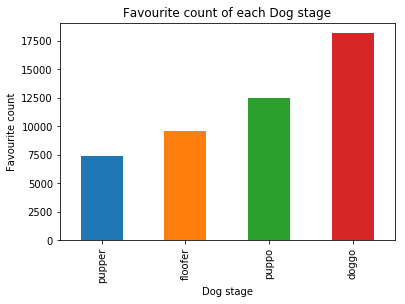

In [9]:
df.plot(kind = 'bar')
plt.title('Favourite count of each Dog stage')
plt.xlabel('Dog stage')
plt.ylabel('Favourite count')

Doggo has the most favourite count.

<a id='two'></a>
### Visualizing 2
Relationship between favorite_count and retweet_count

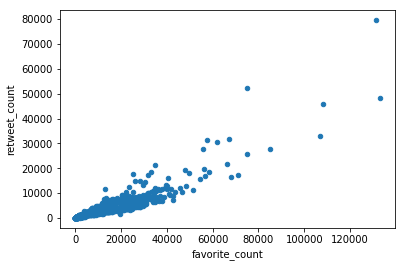

In [344]:
twitter_archive_master.plot.scatter(x="favorite_count", y="retweet_count");

favorite_count is postive correlated with retweet_count.

<a id='three'></a>
### Visualization 3

Common rating?

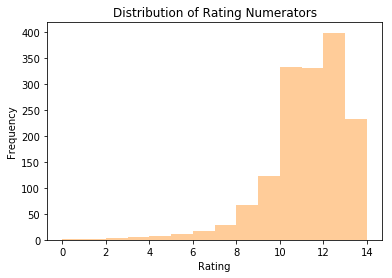

In [350]:
plt.hist(twitter_archive_master['rating_numerator'], bins = np.arange(15), color= '#ffcc99')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Rating Numerators');

In [ ]:
Most people prefer to give 9 to 13.